In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import bomscrape
import numscrape
import math
from collections import Counter
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
budgetdf = numscrape.get_budget()

In [207]:
def make_df(data):
    df = pd.DataFrame()
    movies = data['Movie Title ']
    grosses = data['TotalGross']
    moviesref = budgetdf['MovieTitle']
    thrs = data['TGTheaters']

    for movie in movies:
        if movie in moviesref.values:
            ind = moviesref[moviesref == movie].index[0]
            budget = budgetdf['Budget'][ind]
            mind = movies[movies==movie].index[0]
            gross = grosses[mind]
            theater = thrs[mind]
            if budget == 'N/A' or gross == 'N/A' or theater == 'N/A':
                continue
            else:
                df = df.append(pd.Series([movie, gross, budget, theater]), ignore_index = True)
    df.columns = ['Movie','Gross','Budget', 'Theater']
    return df

In [266]:
# Plot scatter
def plot_scatter(data, rating):
    
    sns.set_style('whitegrid')
#     plt.scatter(data['Budget'], data['Gross'])
    sns.pairplot(data, x_vars=['Budget'], y_vars = 'Gross', size = 7, 
            aspect = 0.7, kind = 'reg')
    

    plt.xlabel('Budget')
    plt.ylabel('Domestic Total Gross in millions')
    plt.title('Domestic total gross by budget for movies rated as '+str(rating)+' from 1994-2013')
    plt.show()
    
    y, X = dmatrices('Gross ~ Budget', data=data, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Rating', data=df, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Studio + TGTheaters+ Opening + OTheaters + Rating', data=df, return_type='dataframe')
    model = sm.OLS(y, X)
    results = model.fit()
    return results.summary()

In [157]:
def driver(rating):
    data = bomscrape.by_rating(rating, 1994, 2013)
    df = make_df(data)
    print plot_scatter(df, rating)

Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...


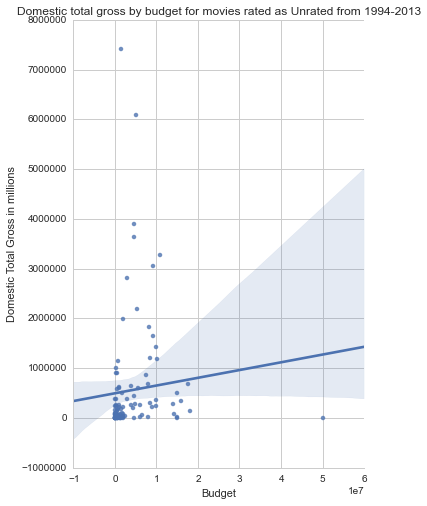

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7822
Date:                Fri, 17 Jul 2015   Prob (F-statistic):              0.378
Time:                        10:49:32   Log-Likelihood:                -1660.7
No. Observations:                 108   AIC:                             3325.
Df Residuals:                     106   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.963e+05   1.32e+05      3.761      0.0

In [272]:
driver('Unrated')

In [186]:
def make_df_tts(ratings):
    df = make_df(bomscrape.by_rating(ratings[0], 1994, 2013))
    df['Rating'] = pd.Series(np.repeat(np.array(ratings[0]),len(df)))
    ratings.pop(0)
    for rating in ratings:
        new = make_df(bomscrape.by_rating(rating, 1994, 2013))
        new['Rating'] = pd.Series(np.repeat(np.array(rating),len(new)))
        df = pd.concat([df,new], ignore_index=True)

    return df

In [200]:
def to_float(array):
    arr = np.empty(len(array))
    
    ratings = ['G','PG','PG-13','R','NC-17','Unrated']
    values = np.arange(float(6))    
    for rt in range(len(array)):
        rating = array[rt]
        index = ratings.index(rating) 
        arr[rt] = values[index]
        
    return arr



In [281]:
ttsdf = make_df_tts(['G', 'PG', 'PG-13'])
ttsdf['Rating']=to_float(ttsdf['Rating'])

Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...


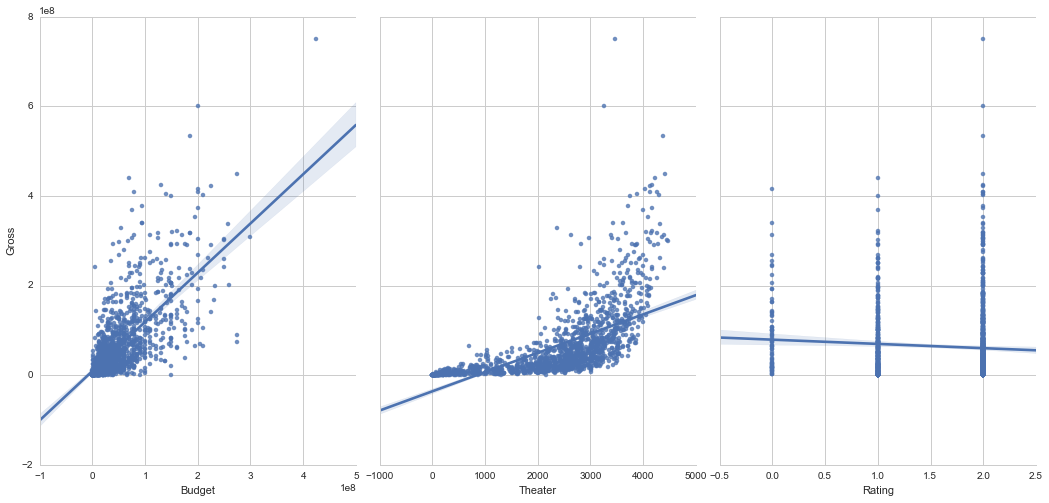

In [282]:
sns.pairplot(ttsdf, x_vars=['Budget', 'Theater', 'Rating'], y_vars = 'Gross', size = 7, 
            aspect = 0.7, kind = 'reg')

In [283]:
X = ttsdf.loc[:,'Budget':'Rating']
y = ttsdf['Gross']

In [284]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 4)

In [285]:
linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [286]:
print linreg.intercept_
print linreg.coef_
print linreg.score(Xtrain, ytrain)
print linreg.score(Xtest, ytest)

-19374204.8685
[  6.46977498e-01   2.44203080e+04  -4.03868479e+06]
0.519832074322
0.564573739256


In [287]:
ypred = linreg.predict(Xtest)
print np.sqrt(metrics.mean_squared_error(ytest, ypred))

59086119.5403


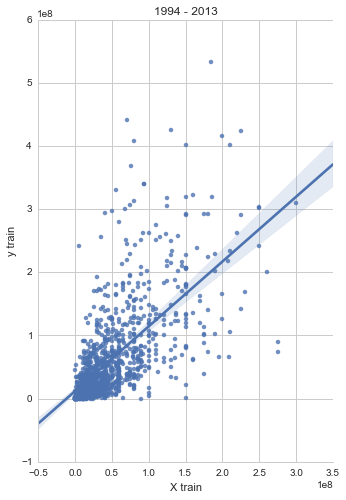

                            OLS Regression Results                            
Dep. Variable:                 ytrain   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     408.9
Date:                Fri, 17 Jul 2015   Prob (F-statistic):          6.26e-180
Time:                        11:01:33   Log-Likelihood:                -21789.
No. Observations:                1137   AIC:                         4.359e+04
Df Residuals:                    1133   BIC:                         4.361e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.937e+07   5.94e+06     -3.264      0.0

In [288]:
train = pd.DataFrame(Xtrain)
train['y train'] = ytrain
train.columns=['X train', 'TheaterTrain','RankTrain','y train']
sns.lmplot('X train','y train',data=train, size = 7, 
            aspect = 0.7)

plt.title('1994 - 2013')
plt.show()
y, X = dmatrices('ytrain ~ Xtrain', data=train, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Rating', data=df, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Studio + TGTheaters+ Opening + OTheaters + Rating', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

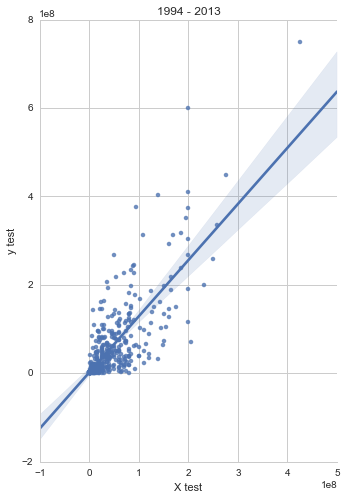

                            OLS Regression Results                            
Dep. Variable:                  ytest   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     194.9
Date:                Fri, 17 Jul 2015   Prob (F-statistic):           3.08e-76
Time:                        11:01:42   Log-Likelihood:                -7318.8
No. Observations:                 380   AIC:                         1.465e+04
Df Residuals:                     376   BIC:                         1.466e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -3.35e+07    1.1e+07     -3.040      0.0

In [289]:
test = pd.DataFrame(Xtest)
test['ytest'] = ytest
test.columns=['X test', 'TheaterTrain','RankTrain','y test']
sns.lmplot('X test','y test',data=test, size = 7, 
            aspect = 0.7)
plt.title('1994 - 2013')
plt.show()
y, X = dmatrices('ytest ~ Xtest', data=test, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

In [333]:
def classify(data):
    s = min(data['Budget'])
    e = max(data['Budget'])
    step = (e - s)/6
    return np.arange(s, e+2, step), step

In [318]:
def average(numbers):
    if len(numbers)==0:
        return
    average = 0
    sumx = 0    
    for n in numbers:
        sumx = sumx + n
    average = sumx / len(numbers)
    return average

In [ ]:
# Plot freq dist. of % gross for a rating
def plot_hist_rats(data, year):
    rating_float = to_float(data['MPAARating'].values)
    labels = ['G','PG','PG-13','R','NC-17','Unrated']
    plt.hist(rating_float, bins=50)

    plt.xlabel('MPAA Rating')
    plt.ylabel('Count')
    plt.title('Movies made in '+str(year))
    plt.xticks([0,1,2,3,4,5], labels)

    plt.show()
    

In [314]:
def labelify(params):
    labels = [(str(params[i-1]) + ' - ' +str(params[i])) for i in range(1, 7, 1)]
    return labels

In [335]:
def bardriver(rating):
    data = bomscrape.by_rating(rating, 1994, 2013)
    df = make_df(data)
    params, step = classify(df)
    labels = labelify(params)

    
    cat1=[]
    cat2=[]
    cat3=[]
    cat4=[]
    cat5=[]
    cat6=[]
    
    for i in range(len(df['Gross'])):
        gross = df['Gross'][i]
        budget = budgetdf['Budget'][i]
        
        if budget < params[1]:
            cat1.append(gross)
        elif budget < params[2]:
            cat2.append(gross)
        elif budget < params[3]:
            cat3.append(gross)
        elif budget < params[4]:
            cat4.append(gross)
        elif budget < params[5]:
            cat5.append(gross)
        else:
            cat6.append(gross)
    cats = [cat1, cat2, cat3, cat4, cat5, cat6]
    avg_gross = [average(x) for x in cats]
    
    cat_budge = params[1:]
    plt.title('Average gross of '+str(rating)+' films by budget')
    plt.xlabel('Budget')
    plt.ylabel('Gross')
    plt.bar(cat_budge, avg_gross, width = step, color = 'orange')
    plt.xticks(params[:7],labels,rotation=17)
    plt.show()
    


Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...


TypeError: unsupported operand type(s) for +=: 'int' and 'NoneType'

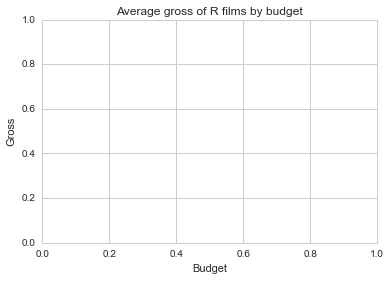

In [337]:
bardriver('PG-13')